# Восстановление золота из руды

Подготовка прототипа модели машинного обучения для компании разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна по параметрам руды на разных этапах обогащения предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В нашем распоряжении датасет с параметрами руды на каждом этапе обработки.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

display(train.info())
display(test.info())
display(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

In [3]:
full.corr()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.063570,0.380142,-0.038373,0.185952,0.334596,-0.051855,0.028890,0.206569,0.071158,...,0.027343,0.104118,0.029887,-0.063246,-0.004246,0.184332,0.003693,0.156471,0.162591,0.059581
final.output.concentrate_pb,0.063570,1.000000,-0.048586,0.374400,0.151987,-0.126886,0.221372,0.094385,-0.047446,0.079160,...,0.058380,0.028962,0.115404,0.093859,0.125920,-0.024668,0.149266,-0.060038,-0.042372,0.067458
final.output.concentrate_sol,0.380142,-0.048586,1.000000,0.261225,0.265993,0.286305,0.221714,-0.023865,0.267781,0.316233,...,-0.049341,0.147304,0.020544,0.002077,-0.002361,0.163992,-0.009510,0.152343,0.245158,-0.216734
final.output.concentrate_au,-0.038373,0.374400,0.261225,1.000000,0.288568,0.080381,0.081291,0.134978,-0.031696,0.102781,...,0.008308,-0.019481,-0.015284,-0.018636,-0.000971,-0.080786,-0.016961,-0.084962,-0.082184,-0.019523
final.output.recovery,0.185952,0.151987,0.265993,0.288568,1.000000,0.125986,-0.143094,-0.050280,-0.409200,0.366954,...,0.167059,0.031317,0.158557,-0.049973,0.067014,0.011871,0.052017,0.016480,-0.025192,-0.005305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.184332,-0.024668,0.163992,-0.080786,0.011871,-0.021662,0.015060,-0.073670,0.035272,-0.098079,...,0.175689,0.737533,0.069865,0.417890,0.154722,1.000000,0.108107,0.818406,0.464142,0.344494
secondary_cleaner.state.floatbank5_b_air,0.003693,0.149266,-0.009510,-0.016961,0.052017,-0.013677,0.132744,-0.135330,-0.160522,-0.088879,...,0.734503,0.289059,0.855785,0.099747,0.895832,0.108107,1.000000,0.090751,0.491707,-0.011976
secondary_cleaner.state.floatbank5_b_level,0.156471,-0.060038,0.152343,-0.084962,0.016480,-0.003762,0.041558,-0.087635,0.063404,-0.054203,...,0.147999,0.630466,0.076251,0.364582,0.135991,0.818406,0.090751,1.000000,0.411510,0.327861
secondary_cleaner.state.floatbank6_a_air,0.162591,-0.042372,0.245158,-0.082184,-0.025192,-0.055311,0.007496,-0.070706,0.038797,-0.175804,...,0.229330,0.503967,0.311676,0.087389,0.473300,0.464142,0.491707,0.411510,1.000000,0.106270


В данных есть пропуски. Т.к. значения переменных за короткие промежутки времени меняются несильно, их можно заполнить последним известным значением.

По условиям задачи мы имеем 2 целевых признака rougher.output.recovery и final.output.recovery.
Для их вычисления нужно спрогнозировать 'final.output.concentrate_au' и 'final.output.tail_au'.

Линейные связи между признаками слабые или неочевидные, т.к. коэффициенты корреляции между ними редко превышают 0.3.

### Проверка корректности расчета rougher.output.recovery

In [4]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

train['rougher.output.recovery.check'] = ((C * (F - T)) / (F * (C - T))) * 100

mae = mean_absolute_error(train['rougher.output.recovery'], train['rougher.output.recovery.check'])
print('MAE между расчетным значением Recovery и значением из датасета:', mae)

recovery_comparison = pd.DataFrame(
    {'data': train['rougher.output.recovery'],
     'calculation': train['rougher.output.recovery.check']})
display(recovery_comparison.head(10))

MAE между расчетным значением Recovery и значением из датасета: 9.73512347450521e-15


,data,calculation
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


MAE, равное 9.7 * 10^-15 говорит о ничтожно малом отклонении, т.е. в датасете эффективность обогащения посчитана корректно. Это видно и из таблицы сравнения между исходным значением rougher.output.recovery (столбец data) и расчетным (столбец calculation).

### Признаки, недоступные в тестовой выборке

In [5]:
list(train.columns)
list(test.columns)

not_in_test = []
for parameter in list(train.columns):
    if parameter not in list(test.columns):
        not_in_test.append(parameter)

print(pd.Series(not_in_test))

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

В тестовой выборке нет параметров output, т.е. параметров продукта и calculation. Судя по всему эти параметры недоступны, потому что замеряются и/или рассчитываются значительно позже, т.е в процессе восстановления золота из руды эти параметры неизвестны.
Перед обучением модели из тренировочной выборки следует удалить эти признаки, т.к. если обучить модель с ними, потом модель, не получившая эти признаки, будет делать некорректные предсказания.

### Предобработка данных

In [6]:
#Заполнение пропусков ближайшими значениями
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

display(train.info())
display(test.info())
display(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


None

In [7]:
#преобразование дат из object в корректный тип данных
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')

print(test['date'].head(1))
print(train['date'].head(1))
print(full['date'].head(1))

0   2016-09-01 00:59:59
Name: date, dtype: datetime64[ns]
0   2016-01-15
Name: date, dtype: datetime64[ns]
0   2016-01-15
Name: date, dtype: datetime64[ns]


## Анализ данных

### Изменение концентрации металлов на разных этапах

Датасет содержит данные по концентрации металлов Au, Ag, Pb на 4 этапах:\
rougher.input\
rougher.output\
primary_cleaner.output\
final.output

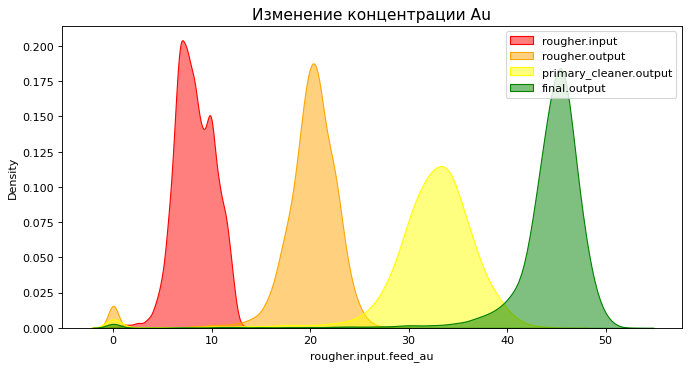

In [8]:
# Au
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(full['rougher.input.feed_au'], shade=True, color="red", label='rougher.input', alpha=.5)
sns.kdeplot(full['rougher.output.concentrate_au'], shade=True, color="orange", label='rougher.output', alpha=.5)
sns.kdeplot(full['primary_cleaner.output.concentrate_au'], shade=True, color="yellow", label='primary_cleaner.output', alpha=.5)
sns.kdeplot(full['final.output.concentrate_au'], shade=True, color="g", label='final.output', alpha=.5)

plt.title('Изменение концентрации Au', fontsize=14)
plt.legend()
plt.show()

На графике распределения плотности видно, что на каждом этапе концентрация золота в продукте значительно повышается. Что логично - в этом главная цель технологического процесса.
Заметен странный всплеск около нуля на кажом этапе - или это отбракованные продукты процесса или ошибки датасета.

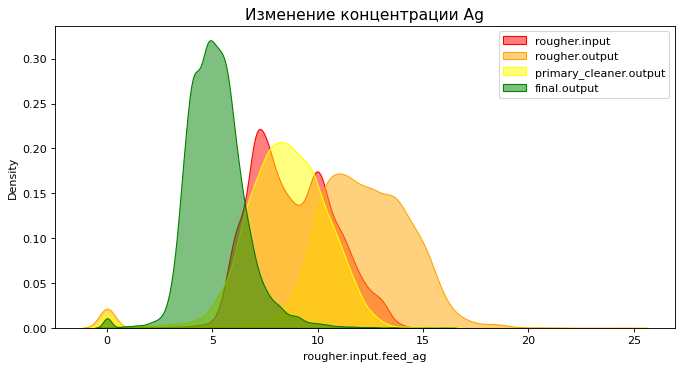

In [9]:
# Ag
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(full['rougher.input.feed_ag'], shade=True, color="red", label='rougher.input', alpha=.5)
sns.kdeplot(full['rougher.output.concentrate_ag'], shade=True, color="orange", label='rougher.output', alpha=.5)
sns.kdeplot(full['primary_cleaner.output.concentrate_ag'], shade=True, color="yellow", label='primary_cleaner.output', alpha=.5)
sns.kdeplot(full['final.output.concentrate_ag'], shade=True, color="g", label='final.output', alpha=.5)

plt.title('Изменение концентрации Ag', fontsize=14)
plt.legend()
plt.show()

Концентрация серебра увеличивается после флотации и заметно снижается на следующих этапах.

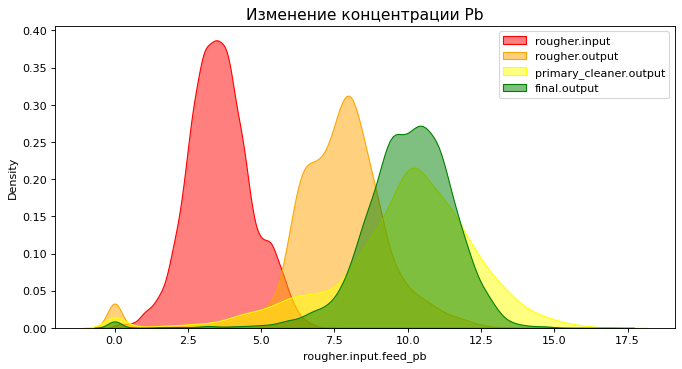

In [10]:
# Pb
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(full['rougher.input.feed_pb'], shade=True, color="red", label='rougher.input', alpha=.5)
sns.kdeplot(full['rougher.output.concentrate_pb'], shade=True, color="orange", label='rougher.output', alpha=.5)
sns.kdeplot(full['primary_cleaner.output.concentrate_pb'], shade=True, color="yellow", label='primary_cleaner.output', alpha=.5)
sns.kdeplot(full['final.output.concentrate_pb'], shade=True, color="g", label='final.output', alpha=.5)

plt.title('Изменение концентрации Pb', fontsize=14)
plt.legend()
plt.show()

Концентрация свинца заметно падает после флотации и первичной очистки. После вторичной очистки концентрация свинца почти не меняется.
Из совокупных данных можно сделать некоторые выводы о технологическом процессе. Например, видно, что на этапе флотации сырье очищается главным образом от свинца и, возможно, от неметаллических примесей. На этапе первой очистки сырье очищается от серебра и свинца, а на второй очистке по большей части от оставшегося серебра.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


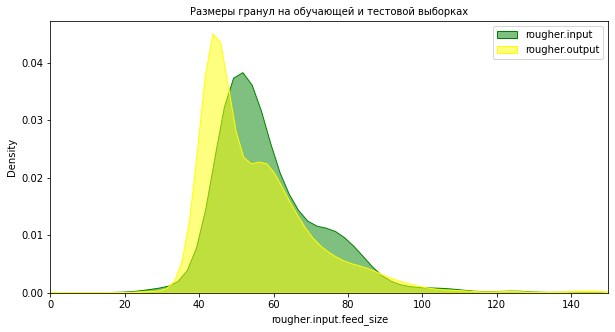

In [11]:
print(train['rougher.input.feed_size'].describe())
print(test['rougher.input.feed_size'].describe())

plt.figure(figsize=(10,5))
sns.kdeplot(train['rougher.input.feed_size'], shade=True, color="g", label='train', alpha=.5)
sns.kdeplot(test['rougher.input.feed_size'], shade=True, color="yellow", label='rougher.test', alpha=.5)

plt.title('Размеры гранул на обучающей и тестовой выборках', fontsize=10)
plt.legend()
plt.xlim([0, 150])
plt.show()

Распределения немного различны. Сложно определить, достаточно ли такой разницы, чтобы она оказывала влияние на оценку модели в дальнейшем. Пока предположим, что разница некритична.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

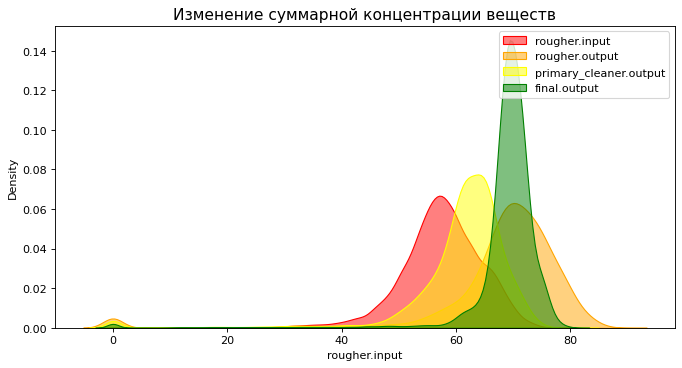

In [12]:
full['rougher.input'] = \
    full['rougher.input.feed_ag'] + \
    full['rougher.input.feed_pb'] + \
    full['rougher.input.feed_sol'] + \
    full['rougher.input.feed_au']

full['rougher.output'] = \
    full['rougher.output.concentrate_ag'] + \
    full['rougher.output.concentrate_pb'] + \
    full['rougher.output.concentrate_sol'] + \
    full['rougher.output.concentrate_au']
    
full['primary_cleaner.output'] = \
    full['primary_cleaner.output.concentrate_ag'] + \
    full['primary_cleaner.output.concentrate_pb'] + \
    full['primary_cleaner.output.concentrate_sol'] + \
    full['primary_cleaner.output.concentrate_au']

full['final.output'] = \
    full['final.output.concentrate_ag'] + \
    full['final.output.concentrate_pb'] + \
    full['final.output.concentrate_sol'] + \
    full['final.output.concentrate_au']

plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(full['rougher.input'], shade=True, color="red", label='rougher.input', alpha=.5)
sns.kdeplot(full['rougher.output'], shade=True, color="orange", label='rougher.output', alpha=.5)
sns.kdeplot(full['primary_cleaner.output'], shade=True, color="yellow", label='primary_cleaner.output', alpha=.5)
sns.kdeplot(full['final.output'], shade=True, color="g", label='final.output', alpha=.5)

plt.title('Изменение суммарной концентрации веществ', fontsize=14)
plt.legend()
plt.show()

На графике видно, что суммарная концентрация веществ растет после флотации, снижается после первой очистки (возможно, из-за очищающих реагентов), и значительно растет после второй очистки. Бросается в глаза, что диапазон распределения после второй очистки значительно уже, чем на предыдущих этапах. Это говорит о некоторой стабильности конечного результата.\

Снова есть аномальный всплеск около нуля. Эти данные могут мешать обучению модели, поэтому из обучающего и общего датасетов их стоит удалить.

In [13]:
def delete_zeros(df):
    criteria_1 = (
        df['rougher.output.concentrate_ag'] + \
        df['rougher.output.concentrate_pb'] + \
        df['rougher.output.concentrate_sol'] + \
        df['rougher.output.concentrate_au']
    )!= 0

    criteria_2 = (
        df['primary_cleaner.output.concentrate_ag'] + \
        df['primary_cleaner.output.concentrate_pb'] + \
        df['primary_cleaner.output.concentrate_sol'] + \
        df['primary_cleaner.output.concentrate_au']
    )!= 0

    criteria_3 = (
        df['final.output.concentrate_ag'] + \
        df['final.output.concentrate_pb'] + \
        df['final.output.concentrate_sol'] + \
        df['final.output.concentrate_au']
    ) != 0
    
    return df.loc[criteria_1 & criteria_2 & criteria_3]

train = delete_zeros(train)
full = delete_zeros(full)

## Модель

### Функция для расчета sMAPE

In [14]:
#поменять индексацию predictions с учетом что это np.array
def smape(target, predictions, **kwargs):
    smape_rougher = 0
    smape_final = 0
    target = target.reset_index(drop=True)
    for i in range(len(target)):
        smape_rougher += abs(target.loc[i, 'rougher.output.recovery'] - predictions[i, 0]) / ((abs(target.loc[i, 'rougher.output.recovery']) + abs(predictions[i, 0])) / 2)
        smape_final += abs(target.loc[i, 'final.output.recovery'] - predictions[i, 1]) / ((abs(target.loc[i, 'final.output.recovery']) + abs(predictions[i, 1])) / 2)
    
    smape_rougher = smape_rougher / len(target) * 100
    smape_final = smape_final / len(target) * 100
    
    smape_score = smape_rougher * .25 + smape_final * .75
    return smape_score

In [15]:
#подготовка данных для обучения

features_train = train.drop(not_in_test,  axis=1)
features_train = features_train.drop(['date'], axis=1)

target_train = train[['rougher.output.recovery', 'final.output.recovery']]

#подтягиваем в тестовую выборку столбцы с целевым признаком из объединенной выборки
full_0 = full[['date', 'rougher.output.recovery', 'final.output.recovery']]
test = test.merge(full_0, on='date')

features_test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

### Модель 1 - DecisionTree

In [16]:
%%time
features_train, target_train = shuffle(features_train, target_train, random_state=12345)

best_depth = 0
best_result = 100
for depth in range(1, 21):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scorer = make_scorer(smape, greater_is_better=False)
    scores = cross_val_score(model, features_train, target_train, scoring=scorer, cv=5)
    if scores.mean() < best_result:
        best_result = scores.mean() * (-1)
        best_depth = depth

print('Лучший результат:', best_result)
print('Лучшая глубина:', best_depth)

Лучший результат: 6.661447691515981
Лучшая глубина: 20
CPU times: user 56.2 s, sys: 22.1 ms, total: 56.3 s
Wall time: 56.3 s


Лучший результат: 6.4793367621685745\
Лучшая глубина: 14

### Модель 2 - RandomForest

In [17]:
#%%time

#best_depth = 0
#best_est = 0
#best_result = 100
#for est in range(10, 101, 10):
#    for depth in range(1, 21):
#        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
#        scorer = make_scorer(smape, greater_is_better=False)
#        scores = cross_val_score(model, features_train, target_train, scoring=scorer, cv=5)
#        if scores.mean() < best_result:
#            best_result = scores.mean() * (-1)
#            best_depth = depth
#            best_est = est

#print('Лучший результат:', best_result)
#print('Лучшее est', best_est)
#print('Лучшая глубина:', best_depth)

Т.к. ячейка выполнялась 4.5 часа, фиксируем показатели лучшей модели, чтобы не запускать повторно:
Лучший результат: 4.868805482459317\
Лучшее est 100\
Лучшая глубина: 20\
Wall time: 4h 31min 8s

### Модель 3 - LinearRegression

In [18]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)
#features_valid_scaled = scaler.transform(features_train) 

model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
scores = cross_val_score(model, features_train_scaled, target_train, scoring=scorer, cv=5)
result = scores.mean() * (-1)

print('sMAPE:', result)

sMAPE: 7.220112366214558


По результатам кросс-валидации лучшая модель - RandomForestRegressor с показателями:
sMAPE: 4.868805482459317\
Гиперпараметры лучшей модели: est=100, depth=20

### Тестирование и проверка на адекватность лучшей модели

In [19]:
model = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=20)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
smape_test = smape(target_test, predictions)
print('RandomForest test sMAPE', smape_test)

#Dummy модель для проверки на адекватность
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_pred = dummy_regr.predict(features_test)
smape_dummy = smape(target_test, dummy_pred)
print('DummyRegressor sMAPE', smape_dummy)

RandomForest test sMAPE 8.204942206647548
DummyRegressor sMAPE 7.778089380065665


## Вывод

В результате кросс-валидации лучшей моделью выглядит RandomForest со значением sMAPE: 4.86.\
Гиперпараметры модели: est=100, depth=20.

На тестовой выборке модель показывает несколько худший показатель sMAPE = 7.9, который очень близок к результату модели Dummy 7.8 - возможно, это специфика данных конкретной тестовой выборки.